# Cluster Actors using a Matrix of Actor x Genre

Create a matrix of actors and the genres in which they've starred. Then, we'll use k-Means to extract clusters from the data in an unsupervised fashion.

In [1]:
%matplotlib inline


In [9]:
import pandas as pd

import json

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


In [4]:
actor_to_genre_df = pd.read_csv("imdb_movies_2000to2022.actorXgenre.csv", index_col="actor_id")

In [5]:
actor_to_genre_df

,Comedy,Fantasy,Romance,Drama,Mystery,Thriller,Action,Biography,Crime,War,...,Horror,Documentary,Sport,News,Family,Music,Unnamed: 22,Western,Short,Reality-TV
actor_id,,,,,,,,,,,,,,,,,,,,,
nm0000212,7.0,1.0,6.0,6.0,1.0,2.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0413168,7.0,3.0,5.0,12.0,5.0,2.0,14.0,4.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0000630,8.0,2.0,6.0,14.0,2.0,3.0,4.0,5.0,1.0,1.0,...,3.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0005227,10.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
nm0864851,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nm9504284,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm10592896,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm7216750,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Apply k-Means with a Fixed K

K-Means requires setting a value for k, so how do you do that? In this exercise, we'll use inertia and the "elbow method" to find a reasonable value for k.

Using this CSV fileLinks to an external site. from GitHub (also available on Canvas in Exercises/data), create a dataframe of actors and their genres.
Starting with k=2, fit a k-means clustering model and record the `.inertia_` parameter of the fitted model.
Repeat step 2 for k from 2 to 30, recording the `.inertia_` value for each k.
Plot the inertia values from k=2..30 and use this plot to select a value for k.

In [6]:
from sklearn.cluster import KMeans

k=2, inertia=682253
k=3, inertia=643862
k=4, inertia=610036
k=5, inertia=580590
k=6, inertia=560391
k=7, inertia=532471
k=8, inertia=513601
k=9, inertia=502407
k=10, inertia=482866
k=11, inertia=453630
k=12, inertia=446065
k=13, inertia=432029
k=14, inertia=429158
k=15, inertia=409565
k=16, inertia=397480
k=17, inertia=400563
k=18, inertia=380036
k=19, inertia=370617
k=20, inertia=364301
k=21, inertia=363061
k=22, inertia=354164
k=23, inertia=342045
k=24, inertia=338553
k=25, inertia=330765
k=26, inertia=324051
k=27, inertia=316343
k=28, inertia=312513
k=29, inertia=302473
k=30, inertia=304389


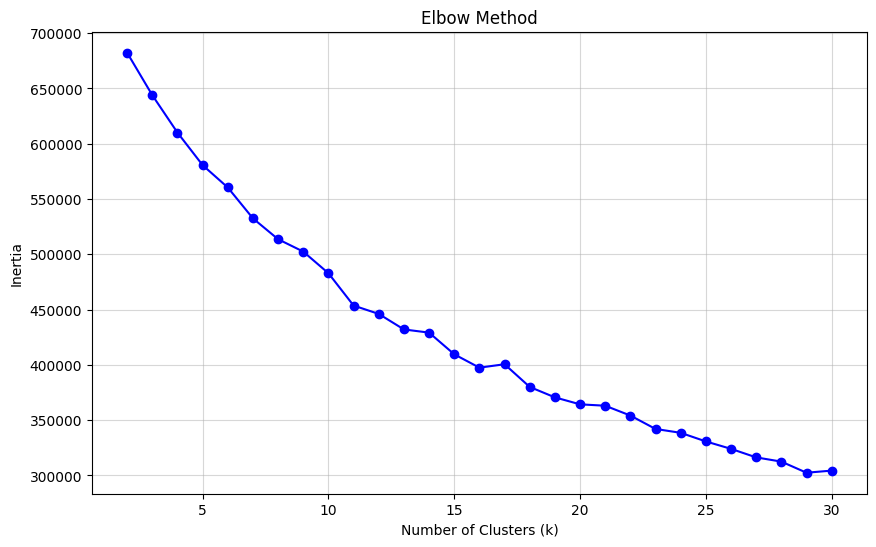

In [12]:
k = 8 # We pick k=8 for illustrative purposes only. You would need a more principled approach here.

scaler = StandardScaler()
scaled_data = scaler.fit_transform(actor_to_genre_df)

# inertia for k from 2 to 30
inertia_values = []
k_range = range(2, 31)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)
    print(f"k={k}, inertia={kmeans.inertia_:.0f}")


plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True, alpha=0.5)
plt.show()

# Optional

Exercise 2 (Optinal). Clustering Actors via DBSCAN

K-Means requires setting a value for k, which is not always an easy to select. Other methods, notably DBSCAN, can infer a value for k.
Using the CSV file from Exercise 1 and the DBSCAN class Links to an external site. from Scikit learn to fit a clustering model to the data.
What is the number of clusters your fitted model uses?
For each cluster, print a random sample of 5 actors in that cluster to get a sense of who is in each cluster

In [15]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Load data
actor_to_genre_df = pd.read_csv("imdb_movies_2000to2022.actorXgenre.csv", index_col="actor_id")

# DBSCAN in 2 lines
dbscan = DBSCAN(eps=2.5, min_samples=5)
clusters = dbscan.fit_predict(actor_to_genre_df)

# Results
print(f"Total clusters: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Noise points: {list(clusters).count(-1)}")

# Show some actors from each cluster
for cluster_id in set(clusters):
    cluster_actors = actor_to_genre_df[clusters == cluster_id]
    print(f"\nCluster {cluster_id}: {len(cluster_actors)} actors")
    print(f"Sample: {list(cluster_actors.index[:3])}")  # Show first 3 actor IDs


Total clusters: 3
Noise points: 2159

Cluster 0: 31438 actors
Sample: ['nm0864851', 'nm0933983', 'nm0329491']

Cluster 1: 5 actors
Sample: ['nm0429114', 'nm0000690', 'nm0021835']

Cluster 2: 7 actors
Sample: ['nm0428963', 'nm0341176', 'nm0000100']

Cluster -1: 2159 actors
Sample: ['nm0000212', 'nm0413168', 'nm0000630']
